In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices

<function tensorflow.python.framework.config.list_physical_devices(device_type=None)>

In [3]:
(X_train,y_train), (X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

we have 50000 image each of size 32 32 and 3 where 3 is RGB

In [5]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

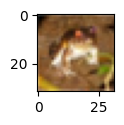

In [6]:
plot_sample(0)

It is small image of frog we make a function to plot images

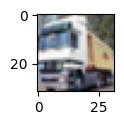

In [7]:
plot_sample(1)

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Now we see the y_train images or what images in y_train index

In [9]:
y_train[3]

array([4], dtype=uint8)

In [ ]:
# classes[y_train[3]]


The error message TypeError: only integer scalar arrays can be converted to a scalar index indicates that the y_train[3] is not an integer. Looking at the global variables, y_train is an ndarray, which means that y_train[3] is a 1-dimensional array. To access the value at index 3, we need to convert it to an integer. This can be done using the int() function.

Therefore, the corrected code should be:

In [10]:
classes [y_train[3][0]] #or classes[int(y_train[3])]

'deer'

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
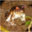

In [11]:
X_train[0]

In [12]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255


In [13]:
X_train_scaled[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [15]:
#for to cateogricl keras provide us with api
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10 , dtype='float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10 , dtype='float32'
)


# **MODEL BUILDUING**

In [17]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')#sigmoid is good with clssification if not specify then it use Linear
])

model.compile(optimizer='SGD' , loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled , y_train_categorical,epochs=70)

Epoch 1/70
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8120 - accuracy: 0.3529
Epoch 2/70
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6239 - accuracy: 0.4278
Epoch 3/70
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5431 - accuracy: 0.4550
Epoch 4/70
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4835 - accuracy: 0.4773
Epoch 5/70
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4354 - accuracy: 0.4946
Epoch 6/70
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3907 - accuracy: 0.5119
Epoch 7/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3527 - accuracy: 0.5241
Epoch 8/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3156 - accuracy: 0.5379
Epoch 9/70
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2849 - accuracy: 0.5519
Epoch 10/70
1563/1563 [==============================] - 8s 5ms/step - loss: 1.252

In [18]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 1s 3ms/step


8

In [20]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.8916 - accuracy: 0.5677


[1.8916144371032715, 0.5677000284194946]

In [21]:
classes[y_test[1][0]]

'ship'

In [26]:
def get_model():
  model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')#sigmoid is good with clssification if not specify then it use Linear
])

  model.compile(optimizer='SGD' , loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [27]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 124s 79ms/step - loss: 1.8147 - accuracy: 0.3523
2min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [28]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8178 - accuracy: 0.3537
14.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
